In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/conda/envs/python/lib/python3

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [0]:
learning_rate = 0.01
training_epochs=20
batch_size = 256
display_step = 1
examples_to_show = 10

n_hidden_1 = 256
n_hidden_2 = 128
n_input = 784

X = tf.placeholder("float", [None,n_input])

weights={
    'encoder_h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1' : tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2' : tf.Variable(tf.random_normal([n_hidden_1, n_input])),
 }

biases={
    'encoder_b1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2' : tf.Variable(tf.random_normal([n_input])),
 }


In [0]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

In [0]:
def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

In [0]:
encoder_op = encoder(X)
decoder_op= decoder(encoder_op)

y_pred = decoder_op
y_true = X

cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

init=tf.global_variables_initializer()

In [0]:
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epochs):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
    
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", "{:.9f}".format(c))

print("Optimization Finished!")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 cost= 0.214549467
Epoch: 0002 cost= 0.179103300
Epoch: 0003 cost= 0.162410066
Epoch: 0004 cost= 0.151195779
Epoch: 0005 cost= 0.146125913
Epoch: 0006 cost= 0.138001963
Epoch: 0007 cost= 0.134982228
Epoch: 0008 cost= 0.127897859
Epoch: 0009 cost= 0.125279441
Epoch: 0010 cost= 0.123631731
Epoch: 0011 cost= 0.121654101
Epoch: 0012 cost= 0.118891872
Epoch: 0013 cost= 0.119557187
Epoch: 0014 cost= 0.118114002
Epoch: 0015 cost= 0.115714751
Epoch: 0016 cost= 0.113402247
Epoch: 0017 cost= 0.111999437
Epoch: 0018 cost= 0.109297536
Epoch: 0019 cost= 0.107239440
Epoch: 0020 cost= 0.108928427
Optimization Finished!


In [0]:
encode_decode = sess.run(y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})

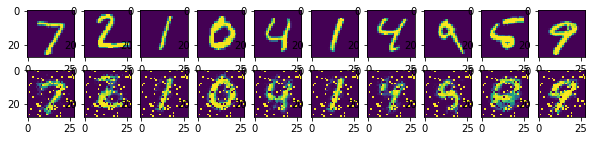

In [0]:
f, a = plt.subplots(2,10, figsize=(10,2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28,28)))